<a href="https://colab.research.google.com/github/lvidak/UUI_projekt/blob/main/UUI_projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install scikit-fuzzy matplotlib pandas

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from IPython.display import display

In [14]:
# 2. FUZZY VARIJABLE (RAZLIČITI UNIVERZUMI)

# Veličina (0–100)
velicina = ctrl.Antecedent(np.arange(0, 101, 1), 'velicina')

# Boja (Hue 0–255)
boja = ctrl.Antecedent(np.arange(0, 256, 1), 'boja')

# Oblik (0–10, okruglost)
oblik = ctrl.Antecedent(np.arange(0, 11, 1), 'oblik')

# Izlaz: klasa (0–100)
klasa = ctrl.Consequent(np.arange(0, 101, 1), 'klasa')

In [15]:
# 3. FUZZY SKUPOVI

# VELIČINA
velicina['vrlo_mala'] = fuzz.trimf(velicina.universe, [0, 0, 20])
velicina['mala']      = fuzz.trimf(velicina.universe, [10, 25, 40])
velicina['srednja']   = fuzz.trimf(velicina.universe, [30, 50, 70])
velicina['velika']    = fuzz.trimf(velicina.universe, [60, 75, 90])
velicina['vrlo_velika'] = fuzz.trimf(velicina.universe, [80, 100, 100])

# BOJA
boja['crvena'] = fuzz.trimf(boja.universe, [0, 0, 60])
boja['zuta']   = fuzz.trimf(boja.universe, [40, 80, 120])
boja['zelena'] = fuzz.trimf(boja.universe, [100, 140, 180])
boja['plava']  = fuzz.trimf(boja.universe, [160, 200, 240])
boja['ljubicasta'] = fuzz.trimf(boja.universe, [220, 255, 255])

# OBLIK
oblik['vrlo_izduzen'] = fuzz.trimf(oblik.universe, [0, 0, 2])
oblik['izduzen']      = fuzz.trimf(oblik.universe, [1, 3, 5])
oblik['srednji']      = fuzz.trimf(oblik.universe, [4, 5, 6])
oblik['okrugao']      = fuzz.trimf(oblik.universe, [5, 7, 9])
oblik['vrlo_okrugao'] = fuzz.trimf(oblik.universe, [8, 10, 10])

# KLASA
klasa['klasa1'] = fuzz.trimf(klasa.universe, [0, 0, 40])
klasa['klasa2'] = fuzz.trimf(klasa.universe, [30, 50, 70])
klasa['klasa3'] = fuzz.trimf(klasa.universe, [60, 100, 100])

In [16]:
# 4. PRAVILA
rules = [
    ctrl.Rule(velicina['vrlo_mala'] & oblik['vrlo_izduzen'], klasa['klasa1']),
    ctrl.Rule(velicina['mala'] & boja['crvena'], klasa['klasa1']),
    ctrl.Rule(velicina['srednja'] & oblik['srednji'], klasa['klasa2']),
    ctrl.Rule(boja['zelena'] & oblik['srednji'], klasa['klasa2']),
    ctrl.Rule(velicina['velika'] & oblik['okrugao'], klasa['klasa3']),
    ctrl.Rule(velicina['vrlo_velika'], klasa['klasa3']),
    ctrl.Rule(boja['plava'] & oblik['vrlo_okrugao'], klasa['klasa3']),
    ctrl.Rule(boja['zuta'] & oblik['izduzen'], klasa['klasa1']),


    ctrl.Rule(velicina['mala'] | velicina['srednja'] | velicina['velika'], klasa['klasa2'])
]

In [22]:
# 5. FUZZY SUSTAV
ctrl_system = ctrl.ControlSystem(rules)

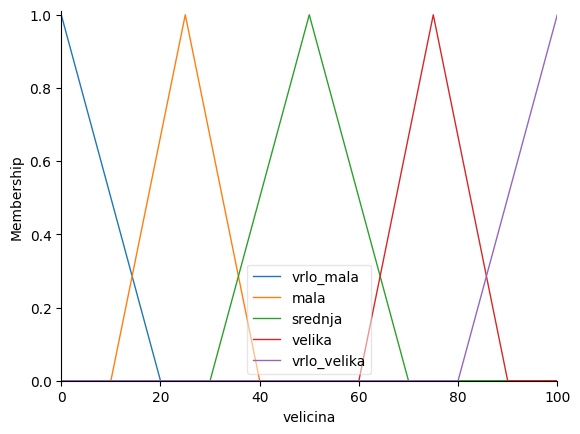

In [23]:
# 6. VIZUALIZACIJA
velicina.view()
plt.show()

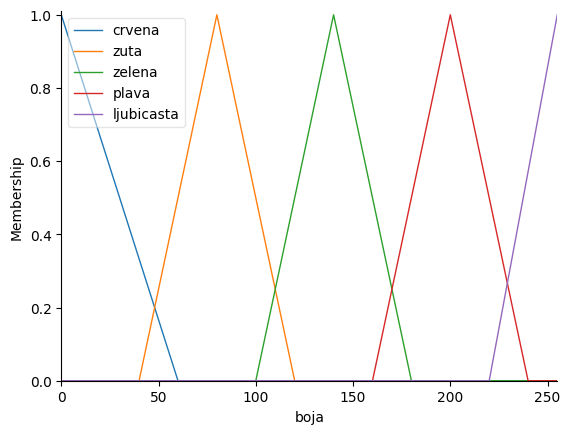

In [24]:
boja.view()
plt.show()

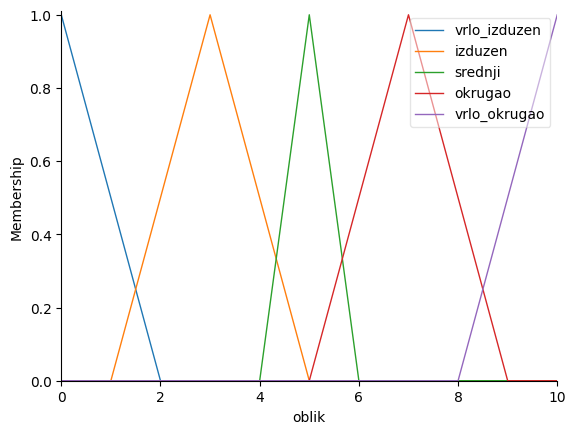

In [25]:
oblik.view()
plt.show()

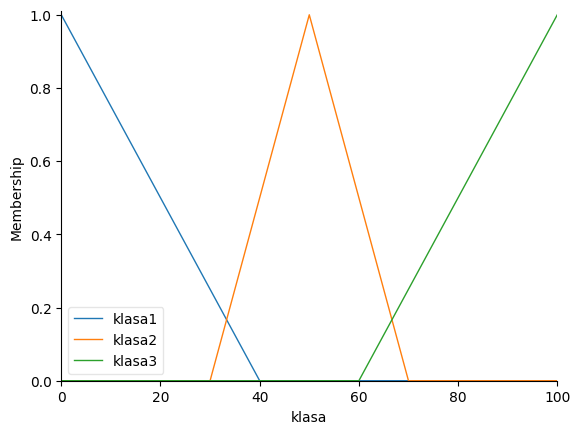

In [26]:
klasa.view()
plt.show()

In [28]:
# 7. KLASIFIKACIJA
def klasificiraj(v, b, o):

    sim = ctrl.ControlSystemSimulation(ctrl_system)

    sim.input['velicina'] = v
    sim.input['boja'] = b
    sim.input['oblik'] = o
    sim.compute()

    # nakon fallback pravila, ovo bi praktično uvijek trebalo postojati
    return sim.output.get('klasa', np.nan)


def odredi_diskretnu_klasu_po_pripadnosti(k):
    """
    Diskretna klasa = ona kojoj k pripada najviše (max membership),
    umjesto grubog rezanja na 40/70.
    """
    if np.isnan(k):
        return 'N/A'

    mu1 = fuzz.interp_membership(klasa.universe, klasa['klasa1'].mf, k)
    mu2 = fuzz.interp_membership(klasa.universe, klasa['klasa2'].mf, k)
    mu3 = fuzz.interp_membership(klasa.universe, klasa['klasa3'].mf, k)

    mus = {1: mu1, 2: mu2, 3: mu3}
    # max po vrijednosti; u slučaju izjednačenja uzme prvi po redu
    return max(mus, key=mus.get)